# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data
2. Cleaning the data
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com).

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [17]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all(class_="site-content",)]
    print(url)
    return text

In [18]:

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/movies/interstellar-2014-transcript/',
        'https://scrapsfromtheloft.com/movies/jumanji-the-next-level-script/',
        'https://scrapsfromtheloft.com/movies/shazam-fury-of-the-gods-transcript/',
        'https://scrapsfromtheloft.com/movies/wonder-woman-1984-transcript/',
        'https://scrapsfromtheloft.com/movies/ant-man-and-the-wasp-quantumania-transcript/',
        'https://scrapsfromtheloft.com/movies/black-adam-transcript/',
        'https://scrapsfromtheloft.com/movies/despicable-me-3-transcript/',
        'https://scrapsfromtheloft.com/movies/thor-love-and-thunder-transcript/',
        'https://scrapsfromtheloft.com/movies/top-gun-maverick-transcript/',
        'https://scrapsfromtheloft.com/movies/jurassic-world-dominion-transcript/',
       ]

# Movies names
Movies = ['interstellar', 'jumanji', 'shazam', 'wonderwomen', 'antman', 'blackadam', 'despicableme', 'thor', 'topgunmaverick', 'jurassicworld']

In [19]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/interstellar-2014-transcript/
https://scrapsfromtheloft.com/movies/jumanji-the-next-level-script/
https://scrapsfromtheloft.com/movies/shazam-fury-of-the-gods-transcript/
https://scrapsfromtheloft.com/movies/wonder-woman-1984-transcript/
https://scrapsfromtheloft.com/movies/ant-man-and-the-wasp-quantumania-transcript/
https://scrapsfromtheloft.com/movies/black-adam-transcript/
https://scrapsfromtheloft.com/movies/despicable-me-3-transcript/
https://scrapsfromtheloft.com/movies/thor-love-and-thunder-transcript/
https://scrapsfromtheloft.com/movies/top-gun-maverick-transcript/
https://scrapsfromtheloft.com/movies/jurassic-world-dominion-transcript/


In [20]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(Movies):
  with open("transcripts/" + c + ".txt", "wb") as file:
      pickle.dump(transcripts[i], file)


mkdir: cannot create directory ‘transcripts’: File exists


In [21]:
# Load pickled files
data = {}
for i, c in enumerate(Movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [22]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['interstellar', 'jumanji', 'shazam', 'wonderwomen', 'antman', 'blackadam', 'despicableme', 'thor', 'topgunmaverick', 'jurassicworld'])

In [23]:
# More checks
data['blackadam'][:2]

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\nNovember 19, 2022 \n\n\n\n\n\n\n\n\t\t\tNearly 5,000 years after he was bestowed with the almighty powers of the Egyptian gods--and imprisoned just as quickly--Black Adam is freed from his earthly tomb, ready to unleash his unique form of justice on the modern world.\r\n\r\n\t\t\n\n\n\n \n\n\n\nBefore Rome, before Babylon, before the pyramids, there was Kahndaq.\nKAHNDAQ, 2600 BC\nThe first self-governing people on Earth, Kahndaq was a center of power and enlightenment. For centuries, they thrived.\nBut then… came King Ahk-Ton. Using the army to seize power, Ahk-Ton became a tyrant. But he had even darker ambitions.\nObsessed with dark magic, Ahk-Ton’s real goal was to forge the Crown of Sabbac.\nIf infused with the powers of the six demons of the ancient world, it would make Ahk-Ton invincible. To make the crown, he needed Eternium. A rare mineral of magic properties, found only in Ka

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [24]:
# Let's take a look at our data again
next(iter(data.keys()))

'interstellar'

In [9]:
# Notice that our dictionary is currently in key: movie, value: list of text format
next(iter(data.values()))

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\nDecember 4, 2022 \n\n\n\n\n\n\n\n\t\t\tWhen Earth becomes uninhabitable in the future, a farmer and ex-NASA pilot, Joseph Cooper, is tasked to pilot a spacecraft, along with a team of researchers, to find a new planet for humans.\t\t\n\n\n\n \n\n\n\nTitle: Interstellar (2014)\nDirector: Christopher Nolan\nWriter: Jonathan Nolan, Christopher Nolan\nGenre: Science Fiction, Drama\nRelease Date: November 5, 2014 (United Kingdom), November 7, 2014 (United States)\nRunning Time: 169 minutes\nPlot Summary:\nSet in a near-future Earth plagued by environmental disasters and a failing food supply, Interstellar follows Joseph Cooper (Matthew McConaughey), a former NASA pilot turned farmer. A mysterious gravitational anomaly leads Cooper and his daughter Murphy (Jessica Chastain as adult, Mackenzie Foy as a child) to a hidden NASA facility. There, Professor Brand (Michael Caine) reveals a plan t

In [25]:
# We are going to change this to key: movie, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [26]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [27]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
antman          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\nApril 18, 2023 \n\n\n\n...
blackadam       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\nNovember 19, 2022 \n\n\n\n\n\n\n\n\t\t\tNearly...
despicableme    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDespicable Me 3 (2017) | Transcript \n\n\n\n\n\n\n\nFebruary 25, 2024 \n\n\n\n\n\n\n\n\t\t\tG...
interstellar    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\nDecember 4, 2022 \n\n\n\n\n\n\n\n\t\t\tWhen ...
jumanji         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJUMANJI: THE NEXT LEVEL (2019) – SCRIPT \n\n\n\n\n\n\n\nFebruary 24, 2020 \n\n\n\n\n\n\n\n\t\...
jurassicworld   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\nJuly 11, 2022 \n\n\n\n\n\n\n\n\t\...
shazam          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\nApril 11, 2023 \n\n\n\n\n\n\n\n\...
thor            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\nSeptember 10, 2022 \n\n\n\n\n\n\n\...
topgunmaverick  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\nAugust 24, 2022 \n\n\n\n\n\n\n\n\t\t\tA...
wonderwomen     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nWonder Woman 1984 (2020) – Transcript \n\n\n\n\n\n\n\nDecember 26, 2020 \n\n\n\n\n\n\n\n\t\t\...

In [28]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [29]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
antman          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\nantman and the wasp quantumania   transcript \n\n\n\n\n\n\n\napril   \n\n\n\n\n\n\n\n\t\t\tsc...
blackadam       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\nblack adam   transcript \n\n\n\n\n\n\n\nnovember   \n\n\n\n\n\n\n\n\t\t\tnearly  years after ...
despicableme    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\ndespicable me    transcript \n\n\n\n\n\n\n\nfebruary   \n\n\n\n\n\n\n\n\t\t\tgru meets his lo...
interstellar    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\ninterstellar   transcript \n\n\n\n\n\n\n\ndecember   \n\n\n\n\n\n\n\n\t\t\twhen earth becomes...
jumanji         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\njumanji the next level  – script \n\n\n\n\n\n\n\nfebruary   \n\n\n\n\n\n\n\n\t\t\tdialogues f...
jurassicworld   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\njurassic world dominion   transcript \n\n\n\n\n\n\n\njuly   \n\n\n\n\n\n\n\n\t\t\tfour years ...
shazam          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\nshazam fury of the gods   transcript \n\n\n\n\n\n\n\napril   \n\n\n\n\n\n\n\n\t\t\tthe film c...
thor            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\nthor love and thunder   transcript \n\n\n\n\n\n\n\nseptember   \n\n\n\n\n\n\n\n\t\t\tthor enl...
topgunmaverick  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\ntop gun maverick   transcript \n\n\n\n\n\n\n\naugust   \n\n\n\n\n\n\n\n\t\t\tafter more than ...
wonderwomen     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmovies \n\n\n\n\n\n\n\nwonder woman   – transcript \n\n\n\n\n\n\n\ndecember   \n\n\n\n\n\n\n\n\t\t\tdiana must conte...

In [30]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [31]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

transcript
antman          movies antman and the wasp quantumania   transcript april   \t\t\tscott lang and hope van dyne along with hank pym and janet van dyne explore the ...
blackadam       movies black adam   transcript november   \t\t\tnearly  years after he was bestowed with the almighty powers of the egyptian godsand imprisoned ju...
despicableme    movies despicable me    transcript february   \t\t\tgru meets his longlost charming cheerful and more successful twin brother dru who wants to tea...
interstellar    movies interstellar   transcript december   \t\t\twhen earth becomes uninhabitable in the future a farmer and exnasa pilot joseph cooper is tasked...
jumanji         movies jumanji the next level  – script february   \t\t\tdialogues full transcript of the movie jumanji the next level \t\t in  three years after ...
jurassicworld   movies jurassic world dominion   transcript july   \t\t\tfour years after the destruction of isla nublar dinosaurs now liveand huntalongside human...
shazam          movies shazam fury of the gods   transcript april   \t\t\tthe film continues the story of teenage billy batson who upon reciting the magic word sh...
thor            movies thor love and thunder   transcript september   \t\t\tthor enlists the help of valkyrie korg and exgirlfriend jane foster to fight gorr the ...
topgunmaverick  movies top gun maverick   transcript august   \t\t\tafter more than thirty years of service as one of the navys top aviators pete mitchell is wher...
wonderwomen     movies wonder woman   – transcript december   \t\t\tdiana must contend with a work colleague and with a businessman whose desire for extreme wealt...

## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [32]:
# Let's take a look at our dataframe
data_df

transcript
antman          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\nApril 18, 2023 \n\n\n\n...
blackadam       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\nNovember 19, 2022 \n\n\n\n\n\n\n\n\t\t\tNearly...
despicableme    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDespicable Me 3 (2017) | Transcript \n\n\n\n\n\n\n\nFebruary 25, 2024 \n\n\n\n\n\n\n\n\t\t\tG...
interstellar    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\nDecember 4, 2022 \n\n\n\n\n\n\n\n\t\t\tWhen ...
jumanji         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJUMANJI: THE NEXT LEVEL (2019) – SCRIPT \n\n\n\n\n\n\n\nFebruary 24, 2020 \n\n\n\n\n\n\n\n\t\...
jurassicworld   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\nJuly 11, 2022 \n\n\n\n\n\n\n\n\t\...
shazam          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\nApril 11, 2023 \n\n\n\n\n\n\n\n\...
thor            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\nSeptember 10, 2022 \n\n\n\n\n\n\n\...
topgunmaverick  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\nAugust 24, 2022 \n\n\n\n\n\n\n\n\t\t\tA...
wonderwomen     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nWonder Woman 1984 (2020) – Transcript \n\n\n\n\n\n\n\nDecember 26, 2020 \n\n\n\n\n\n\n\n\t\t\...

In [33]:
# Let's add the movies full names as well
full_names = ['AntMan 3','Black Adam','Despicable Me 3','Interstellar','Jumanji 3','Jurassic World 3','Shazam 2','Thor 4','Top Gun Maverick 2','Wonder Women 1984']

data_df['full_name'] = full_names
data_df

transcript  \
antman          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\nApril 18, 2023 \n\n\n\n...   
blackadam       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\nNovember 19, 2022 \n\n\n\n\n\n\n\n\t\t\tNearly...   
despicableme    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDespicable Me 3 (2017) | Transcript \n\n\n\n\n\n\n\nFebruary 25, 2024 \n\n\n\n\n\n\n\n\t\t\tG...   
interstellar    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\nDecember 4, 2022 \n\n\n\n\n\n\n\n\t\t\tWhen ...   
jumanji         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJUMANJI: THE NEXT LEVEL (2019) – SCRIPT \n\n\n\n\n\n\n\nFebruary 24, 2020 \n\n\n\n\n\n\n\n\t\...   
jurassicworld   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\nJuly 11, 2022 \n\n\n\n\n\n\n\n\t\...   
shazam          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\nApril 11, 2023 \n\n\n\n\n\n\n\n\...   
thor            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\nSeptember 10, 2022 \n\n\n\n\n\n\n\...   
topgunmaverick  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\nAugust 24, 2022 \n\n\n\n\n\n\n\n\t\t\tA...   
wonderwomen     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nWonder Woman 1984 (2020) – Transcript \n\n\n\n\n\n\n\nDecember 26, 2020 \n\n\n\n\n\n\n\n\t\t\...   

                         full_name  
antman                    AntMan 3  
blackadam               Black Adam  
despicableme       Despicable Me 3  
interstellar          Interstellar  
jumanji                  Jumanji 3  
jurassicworld     Jurassic World 3  
shazam                    Shazam 2  
thor                        Thor 4  
topgunmaverick  Top Gun Maverick 2  
wonderwomen      Wonder Women 1984

In [34]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [35]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

abandon  abandoned  abandoning  abba  abducted  ability  able  \
antman                0          0           0     0         0        0     2   
blackadam             1          0           0     0         0        0     2   
despicableme          0          0           0     0         0        0     0   
interstellar          0          1           0     0         0        0     1   
jumanji               1          0           0     0         0        0     3   
jurassicworld         0          0           0     0         0        0     0   
shazam                0          1           1     0         1        0     0   
thor                  0          0           0     2         0        2     0   
topgunmaverick        0          0           0     0         0        0     0   
wonderwomen           0          0           0     0         0        0     2   

                ableto  aboardemersonemersonis  aboardtars  ...  zhong  \
antman               0                       0           0  ...      0   
blackadam            0                       0           0  ...      0   
despicableme         0                       0           0  ...      0   
interstellar         0                       0           1  ...      0   
jumanji              0                       0           0  ...      0   
jurassicworld        1                       0           0  ...      0   
shazam               0                       0           0  ...      0   
thor                 0                       0           0  ...      0   
topgunmaverick       0                       0           0  ...      0   
wonderwomen          0                       1           0  ...      2   

                zombie  zone  zoologist  zoologisthe  zoologisti  zoologistim  \
antman               0     1          0            0           0            0   
blackadam            0     1          0            0           0            0   
despicableme         0     1          0            0           0            0   
interstellar         0     1          0            0           0            0   
jumanji              0     1          1            1           1            1   
jurassicworld        0     1          0            0           0            0   
shazam               1     1          0            0           0            0   
thor                 0     1          0            0           0            0   
topgunmaverick       0     5          0            0           0            0   
wonderwomen          0     1          1            0           0            0   

                zoologistyou  zoologythats  çathere  
antman                     0             0        0  
blackadam                  0             0        0  
despicableme               0             0        0  
interstellar               0             0        0  
jumanji                    1             1        0  
jurassicworld              0             0        1  
shazam                     0             0        0  
thor                       0             0        0  
topgunmaverick             0             0        0  
wonderwomen                0             0        0  

[10 rows x 19123 columns]

In [36]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [37]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [ ]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub('[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

round2 = lambda x: clean_text_round2(x)
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define parameters for CountVectorizer
ngram_range = (1, 2)  # Unigrams and bigrams
min_df = 5  # Minimum document frequency for a term to be included
max_df = 0.6  # Maximum document frequency for a term to be included

# Create a custom CountVectorizer
custom_cv = CountVectorizer(ngram_range=ngram_range, min_df=min_df, max_df=max_df)

# Fit and transform the text data using the custom CountVectorizer
data_cv_custom = custom_cv.fit_transform(data_clean.transcript)

# Create a DataFrame with the document-term matrix (DTM)
data_dtm_custom = pd.DataFrame(data_cv_custom.toarray(), columns=custom_cv.get_feature_names_out())
data_dtm_custom.index = data_clean.index

# Display the resulting document-term matrix
data_dtm_custom


able  able to  about my  about that  about you  absolutely  \
antman               2        2         1           1          2           1   
batman               1        1         1           3          1           0   
blackadam            2        2         0           2          1           1   
blackpanther         4        4         1           0          0           0   
dungeonsndragons     2        2         0           0          3           1   
interstellar         1        1         3           0          0           1   
jurassicworld        0        0         0           0          0           1   
shazam               0        0         1           3          2           2   
thor                 0        0         0           0          1           0   
topgunmaverick       0        0         0           1          0           0   

                  access  across  admire  after the  ...  youre going  \
antman                 0       1       1          1  ...            0   
batman                 0       1       0          3  ...            1   
blackadam              3       0       0          2  ...            2   
blackpanther           3       1       1          0  ...            2   
dungeonsndragons       2       1       0          1  ...            0   
interstellar           2       3       0          0  ...            1   
jurassicworld          4       2       1          2  ...            1   
shazam                 0       0       0          0  ...            0   
thor                   0       0       1          0  ...            0   
topgunmaverick         0       0       1          0  ...            0   

                  youre the  yours  youthats  youthe  youve been  youwe  \
antman                    3      0         1       0           2      1   
batman                    0      1         1       1           0      0   
blackadam                 3      0         0       3           0      0   
blackpanther              0      2         1       0           1      0   
dungeonsndragons          0      0         0       1           0      1   
interstellar              2      2         0       1           1      1   
jurassicworld             1      1         0       0           1      0   
shazam                    2      3         0       2           0      1   
thor                      0      0         1       0           0      1   
topgunmaverick            0      2         1       0           5      0   

                  youwhat  youwhere  youyeah  
antman                  0         0        0  
batman                  2         1        3  
blackadam               0         1        0  
blackpanther            3         0        1  
dungeonsndragons        1         1        2  
interstellar            0         0        0  
jurassicworld           1         1        1  
shazam                  0         1        0  
thor                    1         0        0  
topgunmaverick          1         1        1  

[10 rows x 782 columns]

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


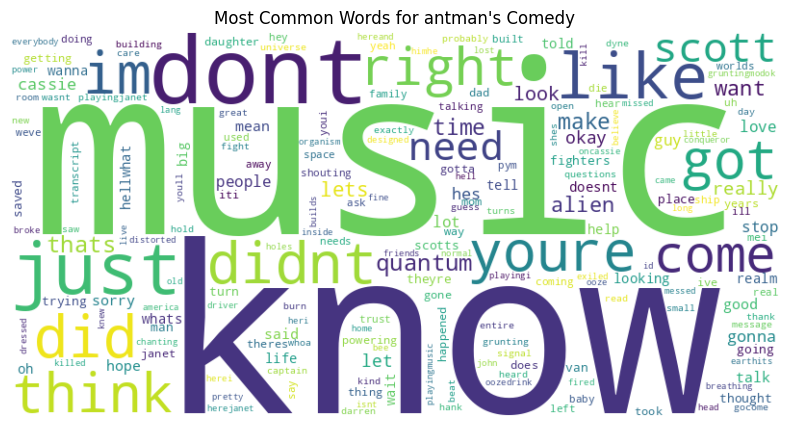

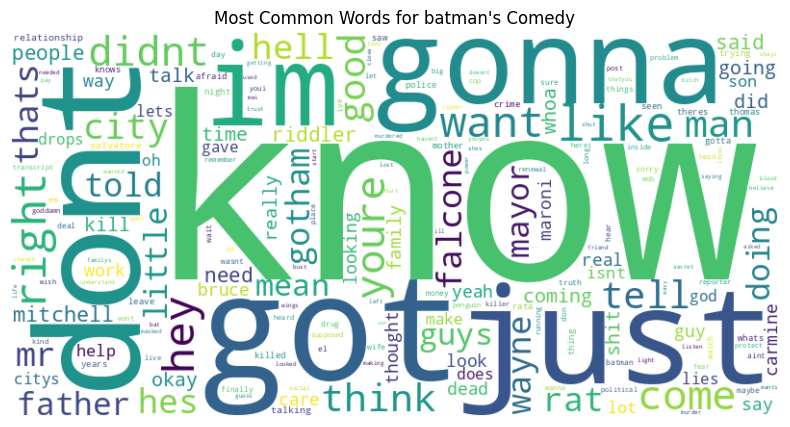

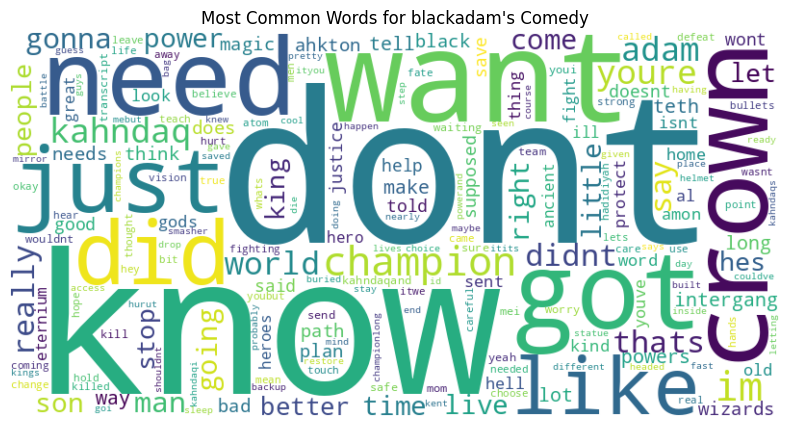

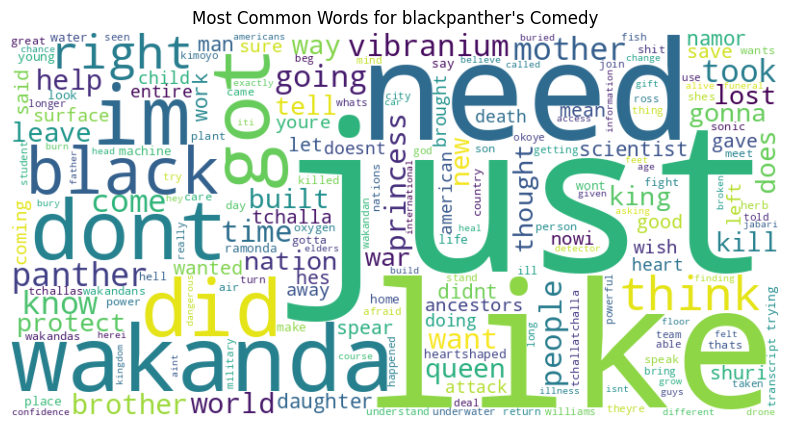

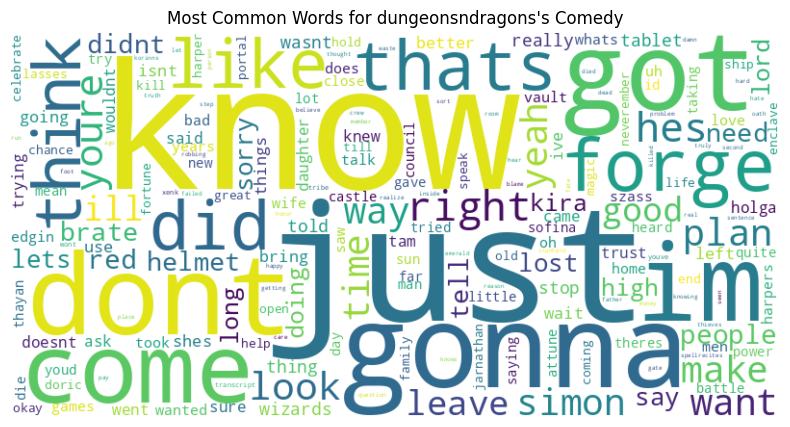

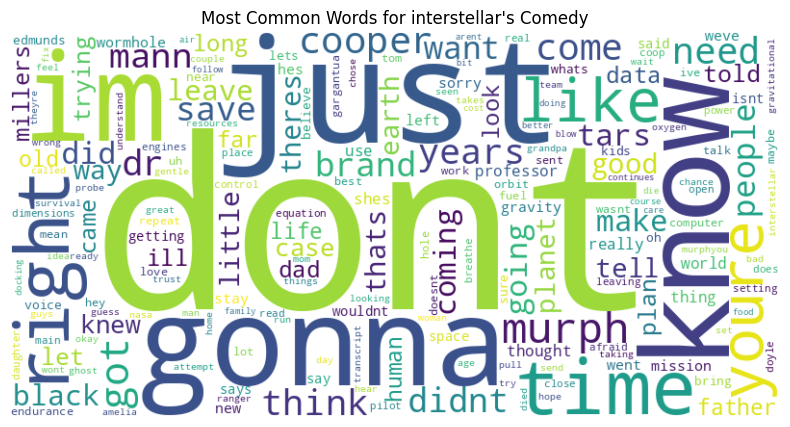

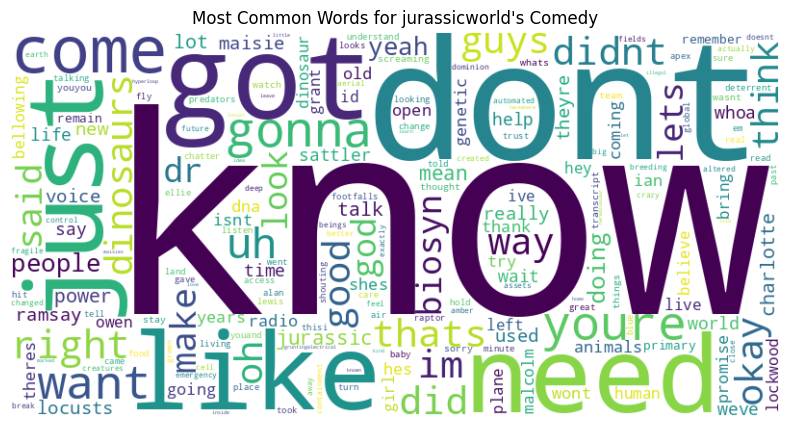

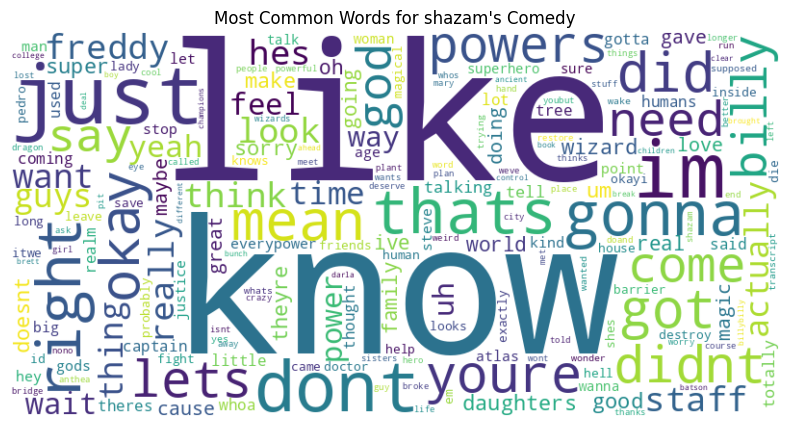

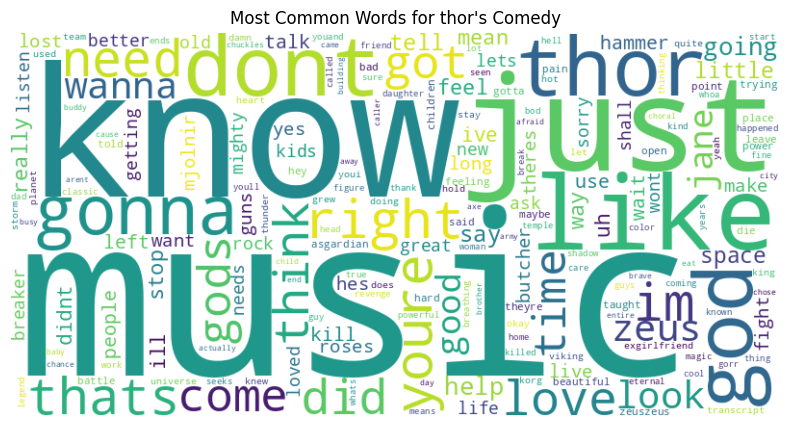

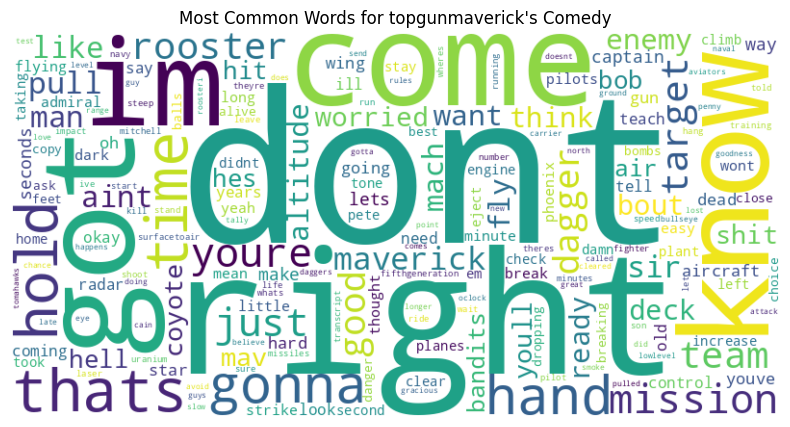

In [ ]:
# task 1
import pickle
from collections import Counter,defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string
#from profanity_check import predict
nltk.download('stopwords')

with open('dtm.pkl', 'rb') as file:
    Movies_data = pickle.load(file)
    Movies_names = Movies_data.index
Movies_word_counts = Movies_data.iloc[:, :]

movie_durations = {'interstellar': 169, 'blackpanther': 161, 'shazam': 130, 'dungeonsndragons': 134, 'antman': 124, 'blackadam': 125, 'batman': 167, 'thor': 119, 'topgunmaverick': 130, 'jurassicworld': 146}
Movies_data['total_words'] = 0
Movies_data['run_times'] = 0
Movies_data['words_per_minute'] = 0.0

def calculate_words_per_minute(movie_name, duration, word_counts):
    total_words = sum(word_counts.values())

    # Calculate words per minute
    if duration != 0:
        words_per_minute = total_words / duration
    else:
        words_per_minute = 0

    return words_per_minute

for Movies_name in Movies_names:
    word_counts = Movies_word_counts.loc[Movies_name, :].to_dict()

    # Check if the word_counts dictionary is not empty
    if not word_counts:
        print(f"No words found for {Movies_name}. Skipping...")
        continue

    # Check if all frequencies are zero
    if all(freq == 0 for freq in word_counts.values()):
        print(f"All word frequencies are zero for {Movies_name}. Skipping...")
        continue

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words for {Movies_name}\'s Comedy')
    plt.show()

    # Check for zero runtime and handle it
    if movie_durations[Movies_name] == 0:
        Movies_data.loc[Movies_name, 'words_per_minute'] = 0
    else:
        # Assign a specific value based on the 'Movies_name'
        words_per_minute = calculate_words_per_minute(Movies_name, movie_durations[Movies_name], word_counts)
        Movies_data.loc[Movies_name, 'words_per_minute'] = words_per_minute


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Task 2
for Movies_name, Movies_words in zip(Movies_names, Movies_word_counts.values):
    all_text = ' '.join([word * int(count) for word, count in zip(Movies_word_counts.columns, Movies_words)]).lower()
    words = word_tokenize(all_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    total_words = len(filtered_words)

    if Movies_name.lower() in movie_durations:
        duration = movie_durations[Movies_name.lower()]
        words_per_minute = total_words / duration
    else:
        words_per_minute = 0.0

    Movies_data.at[Movies_name, 'total_words'] = total_words
    Movies_data.at[Movies_name, 'run_times'] = duration
    Movies_data.at[Movies_name, 'words_per_minute'] = words_per_minute

print(Movies_data[['total_words', 'run_times', 'words_per_minute']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  total_words  run_times  words_per_minute
antman                   2533        124         20.427419
batman                   2664        167         15.952096
blackadam                2078        125         16.624000
blackpanther             2589        161         16.080745
dungeonsndragons         2977        134         22.216418
interstellar             3402        169         20.130178
jurassicworld            3126        146         21.410959
shazam                   2701        130         20.776923
thor                     3067        119         25.773109
topgunmaverick           2312        130         17.784615


Top 10 most common words and their counts:
aboutno: 10
aboutthat: 10
academyset: 10
academytook: 10
academywhy: 10
acceptaccept: 10
accepted: 10
accident: 10
acecaptain: 10
ach: 10


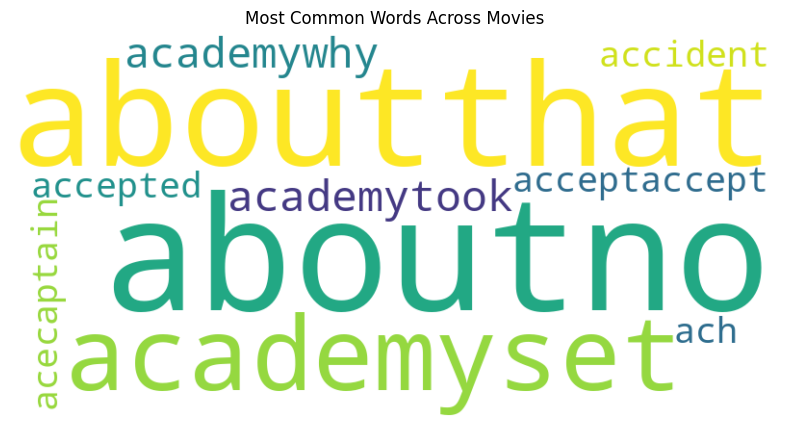

In [ ]:
all_text = ' '.join([' '.join([str(word) * int(count) for word, count in zip(Movies_word_counts.columns,  Movies_words)]) for comedian_words in Movies_word_counts.values]).lower()
words = word_tokenize(all_text)

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in words if word.lower() not in stop_words]

top_words_count = 10
most_common_words = Counter(filtered_words).most_common(top_words_count)

print(f"Top {top_words_count} most common words and their counts:")

for word, count in most_common_words:
    print(f"{word}: {count}")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words Across Movies')
plt.show()

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



#### Find  and print the top 30 words said by each comedian


In [ ]:
Movies_names = Movies_data.index
Movies_word_counts = Movies_data.iloc[:, :]

def get_top_words(Movies_words, top_count=30):
    all_text = ' '.join([word * int(Movies_words[word]) for word in Movies_word_counts.columns]).lower()
    words = word_tokenize(all_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    top_words = Counter(filtered_words).most_common(top_count)

    return top_words

for Movies_name in Movies_names:
    Movies_words = Movies_word_counts.loc[Movies_name, :]
    top_words = get_top_words(Movies_words)

    print(f"\nTop 30 words for {Movies_name}:")
    for word, count in top_words:
        print(f"{word}")



Top 30 words for antman:
ableable
aboutyou
abovelike
absolutely
acceleratingengine
acceleratingfind
accidentally
acronymits
acronymmechanized
actionsometimessong
actually
actuallycassie
address
admire
advanced
adventure
advice
afford
affordable
afraidafraid
againface
againgroansdramatic
againi
againsnifflesim
againthen
agaspsshitcassie
ages
agruntsscott
airportfight
airportwouldnt

Top 30 words for batman:
able
abouta
aboutfalcone
aboutheyi
accessory
accountantaccountanthey
accountants
accountgotham
accounting
actionhes
activeactive
actively
actual
actually
address
administration
afford
afraidafraidafraidafraidafraidafraidafraid
againhe
againheyagainhey
againi
againits
againof
againor
againuntil
againwhat
againyeah
age
agoago
agoim

Top 30 words for blackadam:
abandon
ableable
aboutmake
absolutely
absoluteswhat
accepts
accessaccessaccess
accomplishedmy
according
action
actually
adamadamadamadamadamadamadamadamadamadamadamadamadamadamadamadamadam
adami
adammy
adamokay
adamperhaps
adamp

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [ ]:
stop_words = set(stopwords.words('english'))

def add_stop_words(Movies_words, top_count=30):
    all_text = ' '.join([word * int(Movies_words[word]) for word in Movies_word_counts.columns]).lower()
    words = word_tokenize(all_text)

    top_words = Counter(words).most_common(top_count)
    stop_words.update([word for word, _ in top_words])

    return top_words

for Movies_name in Movies_names:
    Movies_words = Movies_word_counts.loc[Movies_name, :]
    top_words = add_stop_words(Movies_words)

print("\nUpdated stop words list:")
print(stop_words)



Updated stop words list:
{'accessyou', 'activatedwhats', 'had', 'can', 'aboutsuch', 'acthes', 'talkingtalking', 'most', 'abouti', 'into', 'abducted', 'same', 'acknowledgeacknowledgerooster', 'abbaabba', 'it', 'why', 'such', 'were', 'now', 'down', 'off', 'againsnifflesim', 'agoago', 'abandoned', 'absolutelyabsolutely', 'absolutelyis', 'academytook', 'afterlifeand', 'does', 'above', 'accidentally', 'acceptaccept', 'aas', 'aarakocraif', 'letterletter', 'or', 'absolutely', 'acronymits', 'afieldyou', 'yourselves', 'actuallyyou', 'actually', 'achievedprepare', 'administration', 'afraidafraidafraidafraidafraidafraid', 'our', 'than', 'acknowledgement', 'abovelike', "weren't", 'just', "hasn't", 'your', 'agruntsscott', 'adaptadapt', "didn't", 'accountgotham', 'activatedshuri', 'adragonhey', 'adampleasethere', 'there', 'activeall', 'further', 'any', 'advice', 'abilityability', 'absolutionabsolutionabsolution', 'aboutmake', 'absorbing', 'acronymmechanized', 'accomplishedmy', 'adult', 'adf', 'abou

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('aboutno', 10),
 ('aboutthat', 10),
 ('academyset', 10),
 ('academytook', 10),
 ('academywhy', 10),
 ('acceptaccept', 10),
 ('accepted', 10),
 ('accident', 10),
 ('acecaptain', 10),
 ('ach', 10),
 ('achievablethe', 10),
 ('aching', 10),
 ('acknowledgeacknowledgerooster', 10),
 ('acquired', 10),
 ('active', 10),
 ('actually', 10),
 ('actuallywith', 10),
 ('address', 10),
 ('admiraladmiraladmiraladmiraladmiraladmiraladmiral', 10),
 ('admiralexactlyare', 10),
 ('admirals', 10),
 ('admiralthat', 10),
 ('admiraluh', 10),
 ('admire', 10),
 ('admit', 10),
 ('advancementadvancement', 10),
 ('advantagesuccess', 10),
 ('adversaryyoull', 10),
 ('afraidafraid', 10),
 ('afterburnernow', 10),
 ('afterlife', 10),
 ('afternoon', 10),
 ('againiceman', 10),
 ('againoh', 10),
 ('againwhat', 10),
 ('ago', 10),
 ('agothis', 10),
 ('agothree', 10),
 ('agoyou', 10),
 ('ahead', 10),
 ('aheadfeet', 10),
 ('aheadhe', 10),
 ('aimaimaim', 10),
 ('aintaintaintaintaintaintaintaintaintaintaintaintaintaintaint', 10

#### If more than half of the comedians have it as a top word, exclude it from the list


In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['aboutno',
 'aboutthat',
 'academyset',
 'academytook',
 'academywhy',
 'acceptaccept',
 'accepted',
 'accident',
 'acecaptain',
 'ach',
 'achievablethe',
 'aching',
 'acknowledgeacknowledgerooster',
 'acquired',
 'active',
 'actually',
 'actuallywith',
 'address',
 'admiraladmiraladmiraladmiraladmiraladmiraladmiral',
 'admiralexactlyare',
 'admirals',
 'admiralthat',
 'admiraluh',
 'admire',
 'admit',
 'advancementadvancement',
 'advantagesuccess',
 'adversaryyoull',
 'afraidafraid',
 'afterburnernow',
 'afterlife',
 'afternoon',
 'againiceman',
 'againoh',
 'againwhat',
 'ago',
 'agothis',
 'agothree',
 'agoyou',
 'ahead',
 'aheadfeet',
 'aheadhe',
 'aimaimaim',
 'aintaintaintaintaintaintaintaintaintaintaintaintaintaintaint',
 'airairairairairairairairairair',
 'airborne',
 'airbornein',
 'airborneno',
 'airbornestrike',
 'airbreak',
 'airbut',
 'aircraftaircraftaircraftaircraftaircraftaircraftaircraftaircraftaircraft',
 'aircrafteven',
 'aircraftim',
 'aircraftwhat',
 'airfield',
 

In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

with open('data_clean.pkl', 'rb') as file:
    cleaned_data = pickle.load(file)
print("Column Names:", cleaned_data.columns)

def custom_analyzer(text):
    words = word_tokenize(text)
    return [word for word in words if word.lower() not in stop_words]

vectorizer = CountVectorizer(analyzer=custom_analyzer)
dtm = vectorizer.fit_transform(cleaned_data['transcript'])

with open('document_term_matrix.pkl', 'wb') as file:
    pickle.dump(dtm, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


Column Names: Index(['transcript'], dtype='object')


### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [ ]:
with open('dtm.pkl', 'rb') as file:
    Movies_data = pickle.load(file)

Movies_names = Movies_data.index
Movies_word_counts = Movies_data.iloc[:, 1:]

for Movies_name, Movies_words in zip(Movies_names, Movies_word_counts.values):
    all_text = ' '.join([word * count for word, count in zip(Movies_word_counts.columns, Movies_words)]).lower()

    words = word_tokenize(all_text)

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    unique_words = set(filtered_words)
    num_unique_words = len(unique_words)

    print(f"{Movies_name} uses {num_unique_words} unique words.")


antman uses 2532 unique words.
batman uses 2663 unique words.
blackadam uses 2077 unique words.
blackpanther uses 2588 unique words.
dungeonsndragons uses 2973 unique words.
interstellar uses 3400 unique words.
jurassicworld uses 3124 unique words.
shazam uses 2697 unique words.
thor uses 3065 unique words.
topgunmaverick uses 2311 unique words.


### Calculate the words per minute of each comedian


In [ ]:
# Calculate the words per minute of each movie
print("Calculate the words per minute of each movie")
movie_durations = {'interstellar': 169, 'blackpanther': 161, 'shazam': 130, 'dungeonsndragons': 134, 'antman': 124, 'blackadam': 125, 'batman': 167, 'thor': 119, 'topgunmaverick': 130, 'jurassicworld': 146}

for movie_name, movie_words in zip(Movies_names, Movies_word_counts.values):
    all_text = ' '.join([word * count for word, count in zip(Movies_word_counts.columns, movie_words)]).lower()

    # Tokenize the text
    words = word_tokenize(all_text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Calculate the total number of words
    total_words = len(filtered_words)

    # Calculate words per minute
    if movie_name.lower() in movie_durations:
        duration = movie_durations[movie_name.lower()]
        wpm = total_words / duration
        print(f"{movie_name} has {wpm:.2f} words per minute.")
    else:
        print(f"{movie_name} has no duration information.")


# Find the total number of words that a movie uses
print("\nFind the total number of words that a movie uses")
total_words_per_movie = Movies_word_counts.sum(axis=1)

result_df = pd.DataFrame({'Total Words': total_words_per_movie})
print(result_df)


# Add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
print("\nAdd some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'")
# Create new columns
Movies_data['total_words'] = 0
Movies_data['run_times'] = 0
Movies_data['words_per_minute'] = 0.0
for movie_name, movie_words in zip(Movies_names, Movies_word_counts.values):
    # Combine all text data into a single string
    all_text = ' '.join([word * count for word, count in zip(Movies_word_counts.columns, movie_words)]).lower()

    # Tokenize the text
    words = word_tokenize(all_text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Calculate the total number of words
    total_words = len(filtered_words)

    # Calculate words per minute
    if movie_name.lower() in movie_durations:
        duration = movie_durations[movie_name.lower()]
        words_per_minute = total_words / duration
    else:
        words_per_minute = 0.0

    # Update DataFrame with new values
    Movies_data.at[movie_name, 'total_words'] = total_words
    Movies_data.at[movie_name, 'run_times'] = duration
    Movies_data.at[movie_name, 'words_per_minute'] = words_per_minute

# Display the updated DataFrame
# print(Movies_data)

# Sort the dataframe by words per minute to see who talks the slowest and fastest
print("\nSort the dataframe by words per minute to see which movie is the slowest and fastest")
Movies_data_sorted = Movies_data.sort_values(by='words_per_minute', ascending=False)
print(Movies_data_sorted)


Calculate the words per minute of each movie
antman has 20.42 words per minute.
batman has 15.95 words per minute.
blackadam has 16.62 words per minute.
blackpanther has 16.07 words per minute.
dungeonsndragons has 22.20 words per minute.
interstellar has 20.12 words per minute.
jurassicworld has 21.40 words per minute.
shazam has 20.77 words per minute.
thor has 25.76 words per minute.
topgunmaverick has 17.78 words per minute.

Find the total number of words that a movie uses
                  Total Words
antman                   4080
batman                   4815
blackadam                3387
blackpanther             4138
dungeonsndragons         4993
interstellar             6072
jurassicworld            4613
shazam                   4638
thor                     4994
topgunmaverick           4240

Add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'

Sort the dataframe by words per minute to see which movie is the slowest and fastest
               

### plot our findings


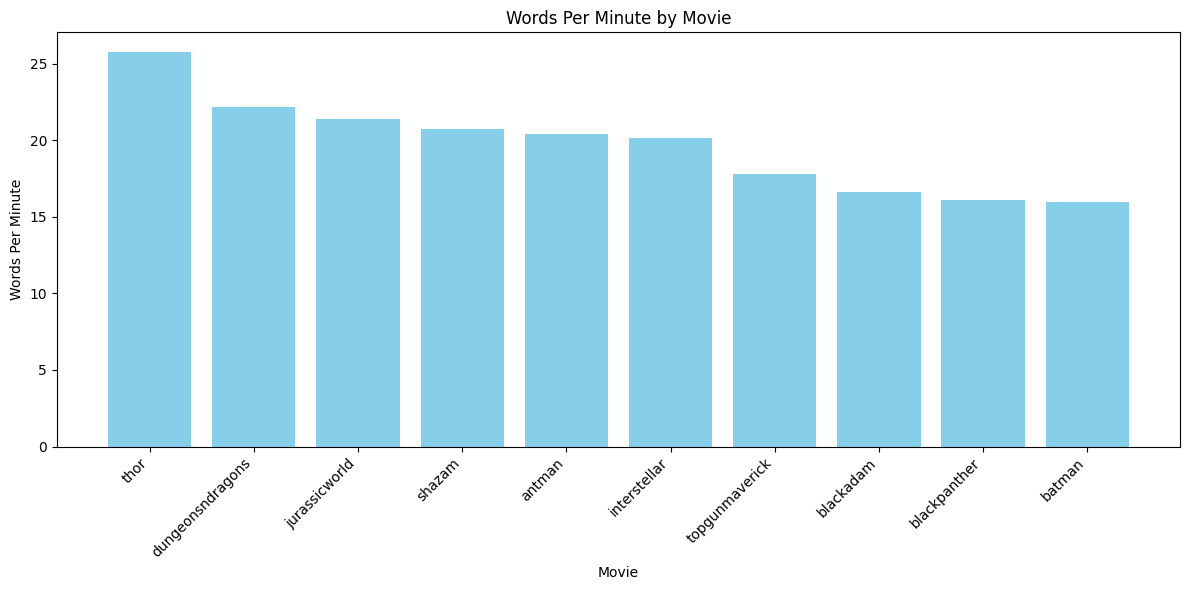

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(Movies_data_sorted.index, Movies_data_sorted['words_per_minute'], color='skyblue')
plt.title('Words Per Minute by Movie')
plt.xlabel('Movie')
plt.ylabel('Words Per Minute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Write your findings. For example:
* **Movie Speed**
  * Thor has the highest words per minute at approximately 25, while Batman has the lowest at around 15.
 * Most movies run at over 22 words per minute, with some variability.
   


### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.


Total Profanity Occurrences:
antman               2
batman              20
blackadam            4
blackpanther         6
dungeonsndragons     5
interstellar        10
jurassicworld        3
shazam               3
thor                 5
topgunmaverick      22
Name: total_profanity, dtype: int64


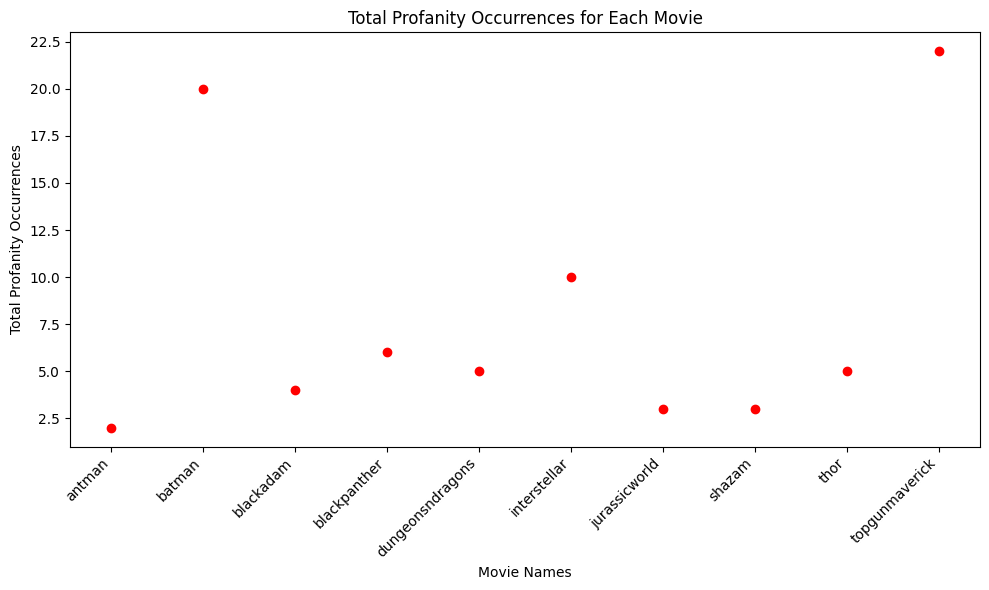

In [ ]:
with open('dtm.pkl', 'rb') as file:
    Movies_data = pickle.load(file)

Movies_names = Movies_data.index
Movies_word_counts = Movies_data.iloc[:, :]

# Define profane words
profane_words = ['fuck', 'fucking', 'shit', 'damn', 'bitch', 'ass']

# Calculate total profanity occurrences for each movie
Movies_data['total_profanity'] = Movies_word_counts[profane_words].sum(axis=1)

# Display the total profanity occurrences
print("\nTotal Profanity Occurrences:")
print(Movies_data['total_profanity'])

# Plot a scatter plot of total profanity occurrences
plt.figure(figsize=(10, 6))
plt.scatter(Movies_data.index, Movies_data['total_profanity'], color='red')
plt.title('Total Profanity Occurrences for Each Movie')
plt.xlabel('Movie Names')
plt.ylabel('Total Profanity Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Write your findings.
* **Movie with the most profanities** - Top Gun Maverick has the highest number of profanity occurrences, with 22.5.
* **Movie with the least profanities** - AntMan has the lowest number of profanity occurrences, with only 1.5.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

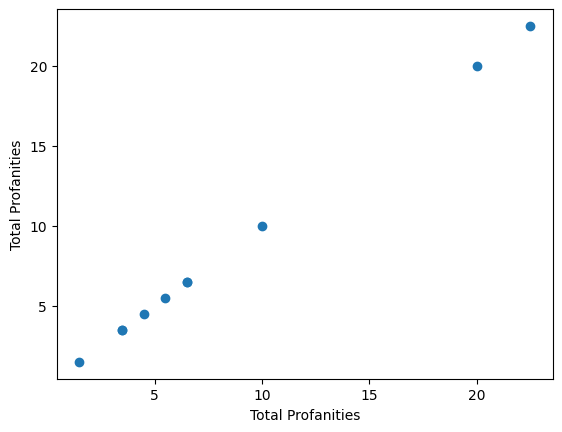

In [ ]:
data = {
    "movie": ['interstellar', 'blackpanther', 'shazam', 'dungeonsndragons', 'antman', 'blackadam', 'batman', 'thor', 'topgunmaverick', 'jurassicworld'],
    "total_profanities": [10, 6.5, 3.5, 5.5, 1.5, 4.5, 20, 6.5 , 22.5, 3.5],
}

df = pd.DataFrame(data)

plt.scatter(df["total_profanities"], df["total_profanities"])
plt.xlabel("Total Profanities")
plt.ylabel("Total Profanities")

# Commenting out the text labels
# for i, row in df.iterrows():
#     plt.text(row["total_profanities"], row["total_profanities"], row["movie"], ha="center", va="center")

plt.show()


## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript  \
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   

                                               full_name  
antman                                          AntMan 3  
batman                                        The Batman  
blackadam                                     Black Adam  
blackpanther                             Black Panther 2  
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  
interstellar                                Interstellar  
jurassicworld                           Jurassic World 3  
shazam                                          Shazam 2  
thor                                              Thor 4  
topgunmaverick                        Top Gun Maverick 2

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript  \
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   

                                               full_name  polarity  \
antman                                          AntMan 3  0.071155   
batman                                        The Batman  0.036670   
blackadam                                     Black Adam  0.132590   
blackpanther                             Black Panther 2  0.138520   
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  0.127002   
interstellar                                Interstellar  0.095193   
jurassicworld                           Jurassic World 3  0.119981   
shazam                                          Shazam 2  0.135908   
thor                                              Thor 4  0.129402   
topgunmaverick                        Top Gun Maverick 2  0.102366   

                  subjectivity  
antman                0.510029  
batman                0.534561  
blackadam             0.535167  
blackpanther          0.497742  
dungeonsndragons      0.522814  
interstellar          0.461420  
jurassicworld         0.485739  
shazam                0.546431  
thor                  0.566870  
topgunmaverick        0.479062

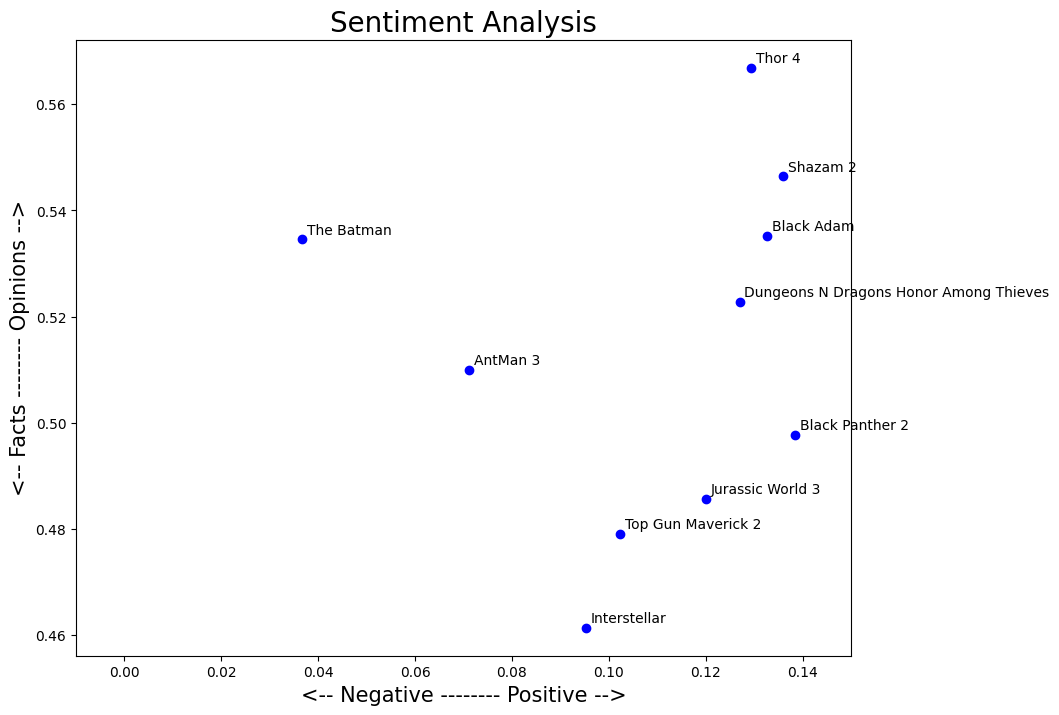

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .15)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

transcript  \
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   

                                               full_name  polarity  \
antman                                          AntMan 3  0.071155   
batman                                        The Batman  0.036670   
blackadam                                     Black Adam  0.132590   
blackpanther                             Black Panther 2  0.138520   
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  0.127002   
interstellar                                Interstellar  0.095193   
jurassicworld                           Jurassic World 3  0.119981   
shazam                                          Shazam 2  0.135908   
thor                                              Thor 4  0.129402   
topgunmaverick                        Top Gun Maverick 2  0.102366   

                  subjectivity  
antman                0.510029  
batman                0.534561  
blackadam             0.535167  
blackpanther          0.497742  
dungeonsndragons      0.522814  
interstellar          0.461420  
jurassicworld         0.485739  
shazam                0.546431  
thor                  0.566870  
topgunmaverick        0.479062

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 18, 2023\t\t\t\t\t\n\n\n\n\n\n\n\n\t\t\tScott Lang and Hope Van Dyne, along with Hank Pym and Janet Van Dyne, explore the Quantum Realm, where they interact with strange creatures and embark on an adventure that goes beyond the limits of what they thought was possible.\r\n\t\t\n\n\n\n \n\n\n\nWhen Scott Lang and Hope van Dyne, along with Hope’s parents, Hank Pym and Janet van Dyne, and Scott’s daughter, Cassie, are accidentally sent to the Quantum Realm, they soon find themselves exploring the Realm, interacting with strange new creatures\n\n* * *\n(SOFT EERIE MUSIC PLAYING)\n(CREATURES GRUNTING)\n(CREATURES GROANING)\n(WHOOSHING)\n(GASPS)\n(SOFT BLAST)\n(TENSE MUSIC PLAYING)\n(JANET BREATHING HEAVILY)\n(PANTING)\n(WIND BLOWING)\n(GROWLS AND CHITTERS)\n(CREATURE HISSES)\n(JANET GASPS)\n(HISSES)\n(SNARLS)\n(GRUNTS)\n(YELPS)\n(SNARLS)\n(J

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.07266064664502164,
  0.12353932464247855,
  0.06390602106227104,
  -0.012488888888888902,
  0.09834004024144868,
  0.014932071002767723,
  0.03916074801084569,
  0.055965714721102656,
  0.06198411959170156,
  0.15564083080040525],
 [0.036554745981015525,
  0.025771825396825397,
  0.08421024822539974,
  0.05696982169721531,
  0.0721167591089466,
  -0.005341358044097922,
  -0.01784903658433071,
  0.06663048917483656,
  -0.0024295079219321526,
  0.04226371744317291],
 [0.1590824425008098,
  0.11268338143338143,
  0.21176833849910773,
  0.0660692872633171,
  0.08890978950502759,
  0.1174416099773243,
  0.10871212121212123,
  0.15792692939244662,
  0.1965525793650794,
  0.1283597337006428],
 [0.06108475711447022,
  0.1319800363327149,
  0.1771594631118441,
  0.12451382185757182,
  0.10349445081062728,
  0.1429857471962735,
  0.15597619047619046,
  0.07756483485650152,
  0.10488253066378063,
  0.26494569424949166],
 [0.13486933491765965,
  0.1392845408772828,
  0.16318968797564687,
  0.0

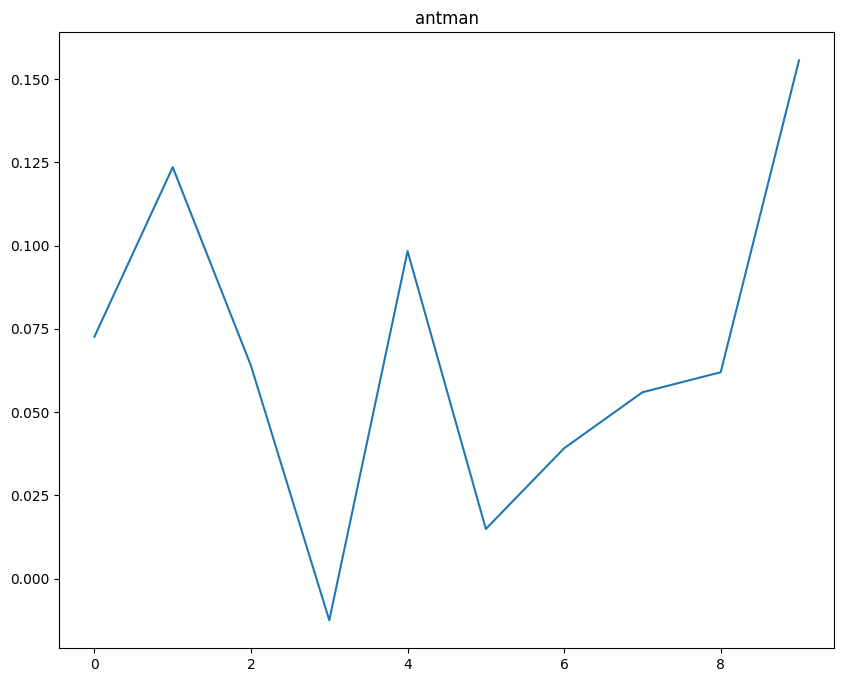

In [ ]:
# Show the plot for one movie
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

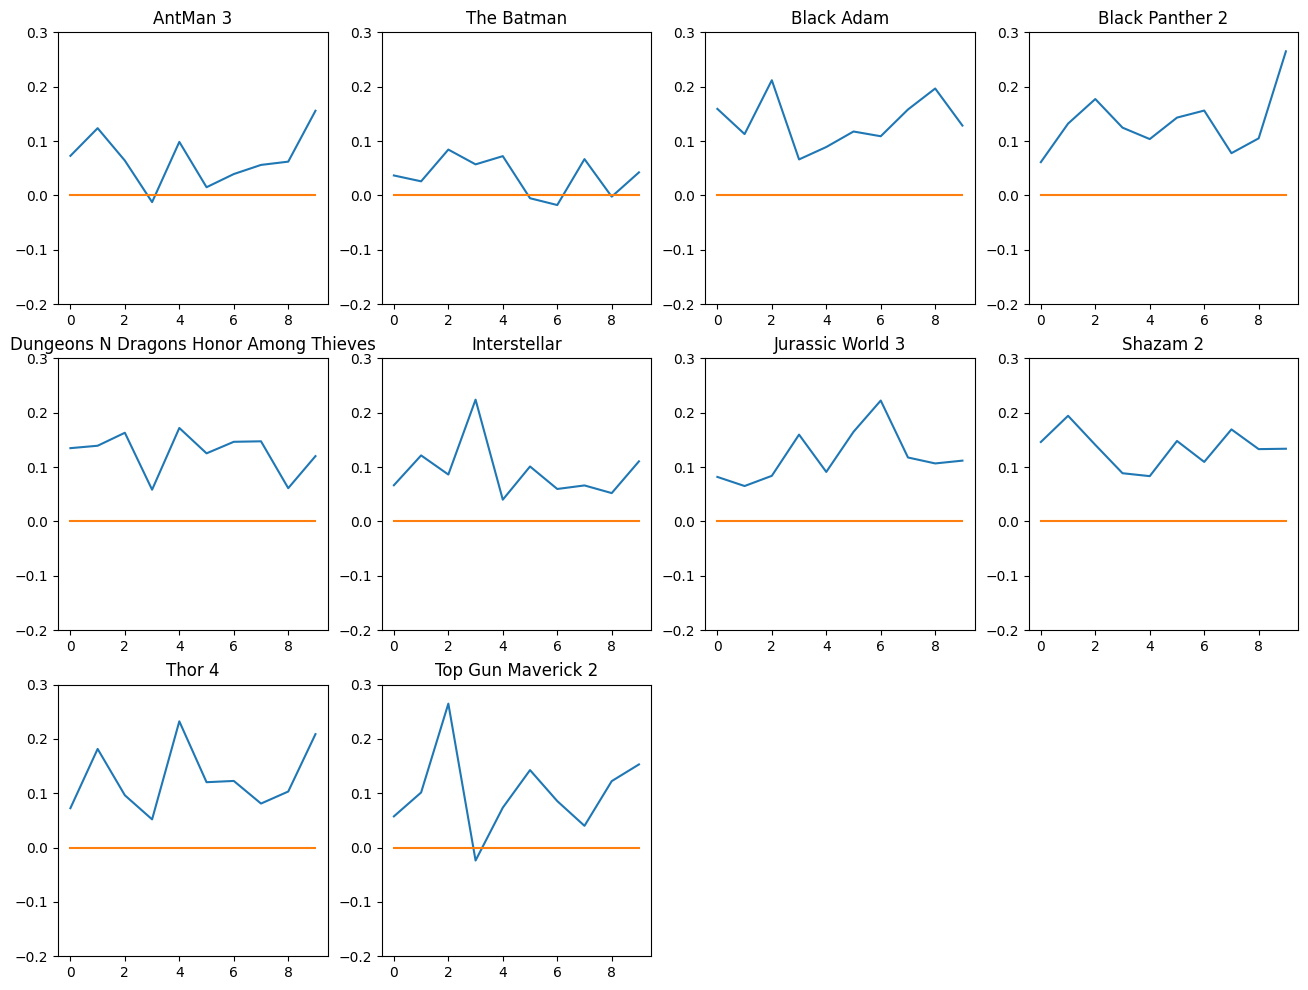

In [ ]:
# Show the plot for all movies
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
data

transcript  \
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   

                                               full_name  polarity  \
antman                                          AntMan 3  0.071155   
batman                                        The Batman  0.036670   
blackadam                                     Black Adam  0.132590   
blackpanther                             Black Panther 2  0.138520   
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  0.127002   
interstellar                                Interstellar  0.095193   
jurassicworld                           Jurassic World 3  0.119981   
shazam                                          Shazam 2  0.135908   
thor                                              Thor 4  0.129402   
topgunmaverick                        Top Gun Maverick 2  0.102366   

                  subjectivity  
antman                0.510029  
batman                0.534561  
blackadam             0.535167  
blackpanther          0.497742  
dungeonsndragons      0.522814  
interstellar          0.461420  
jurassicworld         0.485739  
shazam                0.546431  
thor                  0.566870  
topgunmaverick        0.479062

In [ ]:
#dividing into 3 categoried based upon polarity and subjectivity respectively

total_movies = 10
wanted_category = 3

#sorting data based on polarity column and subjectivty column
data_sort_polarity = data.sort_values(by = 'polarity')
data_sort_subjectivity = data.sort_values(by = 'subjectivity')

for i in range(0,3):
    data_sort_polarity['category'] = 'low'
    data_sort_subjectivity['category'] ='low'
for i in range(3,7):
    data_sort_polarity.iloc[i,-1] = 'medium'
    data_sort_subjectivity.iloc[i,-1] ='medium'
for i in range(7,10):
    data_sort_polarity.iloc[i ,-1] = 'high'
    data_sort_subjectivity.iloc[i,-1] ='high'


In [ ]:
data_sort_polarity

transcript  \
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   

                                               full_name  polarity  \
batman                                        The Batman  0.036670   
antman                                          AntMan 3  0.071155   
interstellar                                Interstellar  0.095193   
topgunmaverick                        Top Gun Maverick 2  0.102366   
jurassicworld                           Jurassic World 3  0.119981   
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  0.127002   
thor                                              Thor 4  0.129402   
blackadam                                     Black Adam  0.132590   
shazam                                          Shazam 2  0.135908   
blackpanther                             Black Panther 2  0.138520   

                  subjectivity category  
batman                0.534561      low  
antman                0.510029      low  
interstellar          0.461420      low  
topgunmaverick        0.479062   medium  
jurassicworld         0.485739   medium  
dungeonsndragons      0.522814   medium  
thor                  0.566870   medium  
blackadam             0.535167     high  
shazam                0.546431     high  
blackpanther          0.497742     high

In [ ]:
data_sort_subjectivity

transcript  \
interstellar      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nInterstellar (2014) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember 4, 2022\t\t\t\t...   
topgunmaverick    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nTop Gun: Maverick (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tAugust 24, 2022\t\t...   
jurassicworld     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nJurassic World Dominion (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 11, 2022...   
blackpanther      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Panther: Wakanda Forever (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuar...   
antman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nAnt-Man and the Wasp: Quantumania (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApr...   
dungeonsndragons  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nDungeons & Dragons: Honor Among Thieves (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\...   
batman            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThe Batman (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 19, 2022\t\t\t\t\t\n...   
blackadam         \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nBlack Adam (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tNovember 19, 2022\t\t\t\t\...   
shazam            \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nShazam! Fury of the Gods (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tApril 11, 20...   
thor              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES \n\n\n\n\n\n\n\nThor: Love and Thunder (2022) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 10, ...   

                                               full_name  polarity  \
interstellar                                Interstellar  0.095193   
topgunmaverick                        Top Gun Maverick 2  0.102366   
jurassicworld                           Jurassic World 3  0.119981   
blackpanther                             Black Panther 2  0.138520   
antman                                          AntMan 3  0.071155   
dungeonsndragons  Dungeons N Dragons Honor Among Thieves  0.127002   
batman                                        The Batman  0.036670   
blackadam                                     Black Adam  0.132590   
shazam                                          Shazam 2  0.135908   
thor                                              Thor 4  0.129402   

                  subjectivity category  
interstellar          0.461420      low  
topgunmaverick        0.479062      low  
jurassicworld         0.485739      low  
blackpanther          0.497742   medium  
antman                0.510029   medium  
dungeonsndragons      0.522814   medium  
batman                0.534561   medium  
blackadam             0.535167     high  
shazam                0.546431     high  
thor                  0.566870     high

In [ ]:
column_names = df.columns
print("Column Names:", column_names)

Column Names: Index(['transcript', 'full_name', 'polarity', 'subjectivity', 'category'], dtype='object')
